In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_openml
from matplotlib import pyplot
from sklearn.svm import SVC

from sklearn import tree,svm

import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
images = mnist["data"]
labels = mnist["target"]

In [4]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3)

0. Develop and train the following models, and get accuracy score: 

*   0.1 - Decision tree
*   0.2 - Random forest
*   0.3 - KNN


### 0.1 Decision tree

In [5]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(train_images, train_labels)

In [6]:
accuracy = decision_tree.score(test_images, test_labels)
print(f"Decision tree accuracy: {accuracy}")

Decision tree accuracy: 0.8667619047619047


Lets show the sample image so we know what it looks like.

In [7]:
sample_image = mnist["data"][0].reshape(28,28)

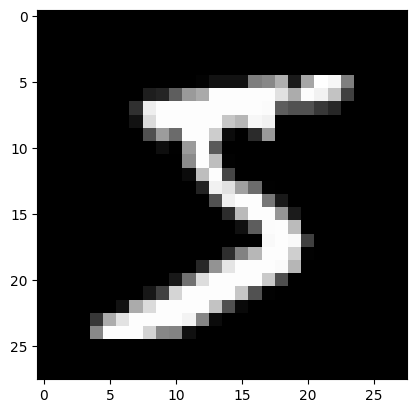

In [8]:
pyplot.imshow(sample_image, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [9]:
decision_tree.predict(sample_image.reshape(1, -1))[0]

'5'

### 0.2 Random forest

In [10]:
random_forrest = RandomForestClassifier()
random_forrest.fit(train_images, train_labels)

RandomForestClassifier()

In [11]:
accuracy = random_forrest.score(test_images, test_labels)
print(f"Random forrest accuracy: {accuracy}")

Random forrest accuracy: 0.9665238095238096


In [12]:
print(random_forrest.predict(sample_image.reshape(1, -1)))

['5']


### 0.3 KNN

In [13]:
neigh = KNeighborsClassifier()
neigh.fit(train_images, train_labels)

KNeighborsClassifier()

In [14]:
accuracy = neigh.score(test_images, test_labels)
print(f"KNN accuracy: {accuracy}")

KNN accuracy: 0.9699047619047619


In [15]:
print(neigh.predict(sample_image.reshape(1, -1)))

['5']


1. Develop and train a voting classifier consisting of the three models above as estimators, and get accuracy score for the following two configurations:  
  
  1.1: Hard voting  
  1.2: Soft voting

### 1.1 Hard voting:

In [16]:
hard = VotingClassifier(estimators=[
        ('dt', decision_tree), ('rf', random_forrest), ('nb', neigh)],
        voting='hard')
hard = hard.fit(train_images, train_labels)

In [17]:
accuracy = hard.score(test_images, test_labels)
print(f"Hard voting accuracy: {accuracy}")

Hard voting accuracy: 0.9668571428571429


In [18]:
print(hard.predict(sample_image.reshape(1, -1)))

['5']


### 1.2 Soft voting:

In [19]:
soft = VotingClassifier(estimators=[
        ('dt', decision_tree), ('rf', random_forrest), ('nb', neigh)],
        voting='soft')
soft = soft.fit(train_images, train_labels)

In [20]:
accuracy = hard.score(test_images, test_labels)
print(f"Soft voting accuracy: {accuracy}")

Soft voting accuracy: 0.9668571428571429


In [21]:
print(hard.predict(sample_image.reshape(1, -1))[0])

5


2. Develop and train the following three models, and compare the accuracy score among them:

  2.1   Decision tree with bagging  
  2.2   Decision tree with pasting  
  2.3   Random forest  


### 2.1 Decision tree with bagging

In [22]:
bagging = BaggingClassifier(bootstrap=True).fit(train_images, train_labels)

In [23]:
accuracy = bagging.score(test_images, test_labels)
print(f"Decision tree with bagging accuracy: {accuracy}")

Decision tree with bagging accuracy: 0.938047619047619


In [24]:
print(bagging.predict(sample_image.reshape(1, -1))[0])

5


### 2.2 Decision tree with pasting


In [25]:
pasting = BaggingClassifier(bootstrap=False).fit(train_images, train_labels)

In [26]:
accuracy = pasting.score(test_images, test_labels)
print(f"Decision tree with pasting accuracy: {accuracy}")

Decision tree with pasting accuracy: 0.8780476190476191


In [27]:
print(pasting.predict(sample_image.reshape(1, -1))[0])

5


### 2.3 Random Forest

In [28]:
random_forrest = RandomForestClassifier()
random_forrest.fit(train_images, train_labels)

RandomForestClassifier()

In [29]:
accuracy = random_forrest.score(test_images, test_labels)
print(f"Random forrest accuracy: {accuracy}")

Random forrest accuracy: 0.9655714285714285


In [30]:
print(random_forrest.predict(sample_image.reshape(1, -1)))

['5']


### 2.4 Comprare Accuracy

Decision tree with bagging accuracy: 0.9411904761904762  
Decision tree with pasting accuracy: 0.8753809523809524   
Random forrest accuracy: 0.9666190476190476 


3. Develop an AdaBoost classifier, and try to find optimized configuration.

### AdaBoost Classifier

In [31]:
adaboost = AdaBoostClassifier()
adaboost.fit(train_images, train_labels)

AdaBoostClassifier()

In [32]:
accuracy = adaboost.score(test_images, test_labels)
print(f"AdaBoost classifier accuracy: {accuracy}")

AdaBoost classifier accuracy: 0.69


In [33]:
print(adaboost.predict(sample_image.reshape(1, -1)))

['3']


### AdaBoost Classifier Optimized configuration

In [34]:
#Create a dictionary of possible parameters
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf'] }

#Create the GridSearchCV object
adaboost_optimized = GridSearchCV(svm.SVC(), params_grid)

#Fit the data with the best possible parameters
adaboost_optimized = adaboost_optimized.fit(train_images, train_labels)

#Print the best estimator with it's parameters
print (adaboost_optimized.best_params_)

: 

In [1]:
accuracy = adaboost_optimized.score(test_images, test_labels)
print(f"AdaBoost GridSearchCV classifier accuracy: {accuracy}")

NameError: name 'adaboost_optimized' is not defined

In [ ]:
print(adaboost_optimized.predict(sample_image.reshape(1, -1)))